# 格式化数据集

In [1]:
from datasets import EnglishChineseTranslateDatasets

ds = EnglishChineseTranslateDatasets(need_format=True)
train_x, train_y = ds.load_train_data()
test_x, test_y = ds.load_test_data()
print(f"train {len(train_x)}, test {len(test_x)}")

ds.save()

train 5161434, test 39323


# 翻译语料库统计分析

In [7]:
from datasets import EnglishChineseTranslateDatasets, EnglishFrenchTranslateDatasets

ds = EnglishChineseTranslateDatasets()
# ds = EnglishFrenchTranslateDatasets()

train_x, train_y = ds.load_train_data()
test_x, test_y = ds.load_test_data()
print(f"train {len(train_x)}, test {len(test_x)}")
print(list(zip(train_x[:5], train_y[:5])))

train 5161434, test 39323
[('For greater sharpness, but with a slight increase in graininess, you can use a 1:1 dilution of this developer.', '为了更好的锐度，但是附带的会多一些颗粒度，可以使用这个显影剂的1：1稀释液。'), ('He calls the Green Book, his book of teachings, "the new gospel.', '他还把宣扬自己思想的所谓《绿皮书》称作“新福音书”。'), ('And the light breeze moves me to caress her long ear', '微风推着我去爱抚它的长耳朵'), ('They have the blood of martyrs is the White to flow .', '它们的先烈们的鲜血是白流了…'), ("Finally, the Lakers head to the Motor City to take on a Pistons team that currently owns the Eastern Conference's second best record (1/31). L.", '最后，在1月31日，湖人将前往汽车城底特律挑战活塞队，活塞近来在东部排名第二。')]


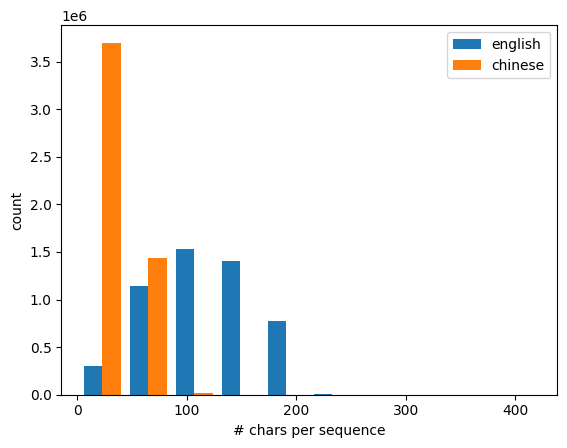

In [8]:
import collections
import numpy as np
import matplotlib.pyplot as plt


plt.figure()
eng_len_list = [
    len(item) for item in train_x
]
ch_len_list = [
    len(item) for item in train_y
]
plt.hist([
    eng_len_list, ch_len_list
])

plt.xlabel("# chars per sequence")
plt.ylabel("count")

plt.legend([
    "english", "chinese"
])
plt.show()

# 分词和词典处理

In [5]:
from vocab import Vocab, BEGIN_SENTENCE, END_SENTENCE

reserved_tokens = [
    BEGIN_SENTENCE,
    END_SENTENCE
]
english_voc = Vocab(train_x, min_freq=5, reserved_tokens=reserved_tokens)
chinese_voc = Vocab(train_y, min_freq=5, reserved_tokens=reserved_tokens)

In [6]:
print(f"english voc token count: {len(english_voc)}")
print(f"chinese voc token count: {len(chinese_voc)}")

english voc token count: 53
chinese voc token count: 68


# Vocab类测试与验证

In [22]:
print(english_voc["n"], english_voc.to_tokens(list(range(10))))
print(chinese_voc["海"], chinese_voc.to_tokens(list(range(10))))
print(english_voc["海"])

9 ['<unk>', '<bos>', '<eos>', ' ', 'e', 't', 'a', 'o', 'i', 'n']
310 ['<unk>', '<bos>', '<eos>', '的', '，', '。', '一', '在', '是', '了']
0


# 翻译模型训练数据转换

In [17]:
from datasets import EnglishChineseTranslateDatasets
from data_generator import TranslateDataGenerator


ds = EnglishChineseTranslateDatasets()
test_x, test_y = ds.load_test_data()
gen = TranslateDataGenerator(
    test_x, test_y, x_sentence_len=200, y_sentence_len=100
)


idx=123
enc_x, x_len, enc_y, y_len, target_y = gen[idx]
print(test_x[idx])
print(f"len: {x_len}")
print(list(enc_x))
print(test_y[idx])
print(f"len: {y_len}")
print(list(enc_y))
print(list(target_y))
print("from label to tokens...")
print(''.join(gen.x_vocab.to_tokens(list(enc_x[: x_len]))))
print(''.join(gen.y_vocab.to_tokens(list(enc_y[: y_len]))))
print(''.join(gen.y_vocab.to_tokens(list(target_y[: y_len]))))

building source vocab...
building targe vocab...
converting x to enc_x...
converting y to dec_x...
The research of dynamic competition is a fast - developing branch of strategic management theory since of 1980s early, and at-tracting increasing attention from abroad and home.
len: 177
[28, 12, 4, 3, 11, 4, 10, 4, 6, 11, 15, 12, 3, 7, 18, 3, 14, 21, 9, 6, 17, 8, 15, 3, 15, 7, 17, 19, 4, 5, 8, 5, 8, 7, 9, 3, 8, 10, 3, 6, 3, 18, 6, 10, 5, 3, 29, 3, 14, 4, 26, 4, 13, 7, 19, 8, 9, 20, 3, 23, 11, 6, 9, 15, 12, 3, 7, 18, 3, 10, 5, 11, 6, 5, 4, 20, 8, 15, 3, 17, 6, 9, 6, 20, 4, 17, 4, 9, 5, 3, 5, 12, 4, 7, 11, 21, 3, 10, 8, 9, 15, 4, 3, 7, 18, 3, 47, 64, 69, 38, 10, 3, 4, 6, 11, 13, 21, 25, 3, 6, 9, 14, 3, 6, 5, 29, 5, 11, 6, 15, 5, 8, 9, 20, 3, 8, 9, 15, 11, 4, 6, 10, 8, 9, 20, 3, 6, 5, 5, 4, 9, 5, 8, 7, 9, 3, 18, 11, 7, 17, 3, 6, 23, 11, 7, 6, 14, 3, 6, 9, 14, 3, 12, 7, 17, 4, 24, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
动态竞争的研究始于80年代初，至今仍是国外企业战略管理学界最重要、讨论最热烈的研究方向